In [1]:
import sys
sys.path.append('pandana')
sys.path.append('NOvAPandAna')

from pandana import Var, Cut
from Core.NOVASpectrum import NOVASpectrum
from Core.NOVALoader import NOVALoader
from Utils.index import KL

--------------------------------------------------------------------------
The library attempted to open the following supporting CUDA libraries,
but each of them failed.  CUDA-aware support is disabled.
libcuda.so.1: cannot open shared object file: No such file or directory
libcuda.dylib: cannot open shared object file: No such file or directory
/usr/lib64/libcuda.so.1: cannot open shared object file: No such file or directory
/usr/lib64/libcuda.dylib: cannot open shared object file: No such file or directory
If you are not interested in CUDA-aware support, then run with
--mca opal_warn_on_missing_libcuda 0 to suppress this message.  If you are interested
in CUDA-aware support, then try setting LD_LIBRARY_PATH to the location
of libcuda.so.1 to get passed this issue.
--------------------------------------------------------------------------


In [2]:
kNHit = Var(lambda tables: tables['rec.slc']['nhit'])

In [3]:
kHitCut = kNHit > 100

In [4]:
kPngHit = Var(lambda tables: tables['rec.vtx.elastic.fuzzyk.png']['nhit'])

In [5]:
kPngCut = kPngHit < 100

In [6]:
def kPngHitTotal(tables):
    df = kPngHit(tables)
    return df.groupby(KL).sum()
kPngHitTotal = Var(kPngHitTotal)

In [7]:
l = NOVALoader('testData.h5')

Using glob souce


In [8]:
SlcSpec = NOVASpectrum(l, kHitCut, kNHit)
PngSpec = NOVASpectrum(l, kPngCut, kPngHit)
ComplicatedSpec = NOVASpectrum(l, (kPngHitTotal > 25) & kPngCut, kPngHit)

In [9]:
l.Go()

In [10]:
SlcSpec.df()

run    subrun  cycle  batch  evt  subevt
12732  0       4      3      2    1         254
                             19   2         199
                             51   4         106
                             107  1         114
                             114  5         112
                                           ... 
13031  19      37     1      358  3         220
                             370  3         331
                             372  1         167
                             479  2         281
                             485  6         206
Name: nhit, Length: 11425, dtype: uint32

In [11]:
n, bins = SlcSpec.histogram(5, (100, 1000))

In [12]:
n

array([1.0603e+04, 6.6700e+02, 1.2300e+02, 2.2000e+01, 8.0000e+00])

In [13]:
bins

array([ 100.,  280.,  460.,  640.,  820., 1000.])

In [14]:
import matplotlib.pyplot as plt

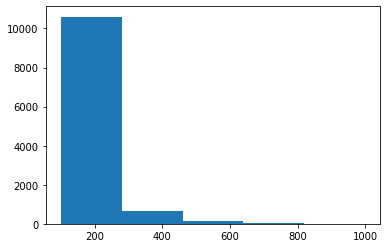

In [15]:
_ = plt.hist(bins[:-1], bins, weights=n)

In [16]:
SlcSpec.weight()

run    subrun  cycle  batch  evt  subevt
12732  0       4      3      2    1         1
                             19   2         1
                             51   4         1
                             107  1         1
                             114  5         1
                                           ..
13031  19      37     1      358  3         1
                             370  3         1
                             372  1         1
                             479  2         1
                             485  6         1
Name: weight, Length: 11425, dtype: int64

In [17]:
ComplicatedSpec.df()

run    subrun  cycle  batch  evt  subevt  rec.vtx.elastic.fuzzyk.png_idx
12732  0       4      3      2    1       1                                 51
                                          2                                 69
                                          3                                 13
                             8    1       0                                 67
                             19   2       1                                 38
                                                                            ..
13031  19      37     1      495  6       0                                 17
                                          1                                  8
                                          2                                  6
                             499  9       0                                 58
                                          1                                  8
Name: nhit, Length: 63374, dtype: uint16

In [18]:
n, bins = ComplicatedSpec.histogram(25,(0,100))

In [19]:
n.sum()

63374.0